<a href="https://colab.research.google.com/github/javohir-ergashboyev/ML-projects/blob/main/Customer_Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn import metrics
from sklearn.pipeline import Pipeline

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree,DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier



In [9]:
url="https://github.com/anvarnarz/praktikum_datasets/blob/main/E-Commerce-Dataset.xlsx?raw=true"
df=pd.read_excel(url, sheet_name='E Comm')
df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


In [10]:
description = pd.read_excel(url, sheet_name="Data Dict", header=1, usecols=[1,2,3])
description

,Data,Variable,Discerption
0,E Comm,CustomerID,Unique customer ID
1,E Comm,Churn,Churn Flag
2,E Comm,Tenure,Tenure of customer in organization
3,E Comm,PreferredLoginDevice,Preferred login device of customer
4,E Comm,CityTier,City tier
5,E Comm,WarehouseToHome,Distance in between warehouse to home of customer
6,E Comm,PreferredPaymentMode,Preferred payment method of customer
7,E Comm,Gender,Gender of customer
8,E Comm,HourSpendOnApp,Number of hours spend on mobile application or...
9,E Comm,NumberOfDeviceRegistered,Total number of deceives is registered on part...


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [12]:
df['Churn'].value_counts()/len(df)*100

0    83.161634
1    16.838366
Name: Churn, dtype: float64

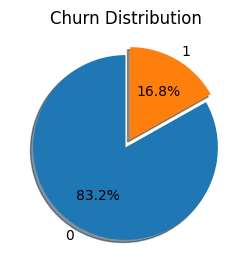

In [21]:
# prompt: draw piechart showing remaing and losing churn

fig, ax = plt.subplots(figsize=(4, 3))
df['Churn'].value_counts().plot(kind='pie', explode=[0, 0.1], autopct='%1.1f%%', shadow=True, startangle=90, ax=ax)
ax.set_title('Churn Distribution')
ax.set_ylabel('')
plt.show()


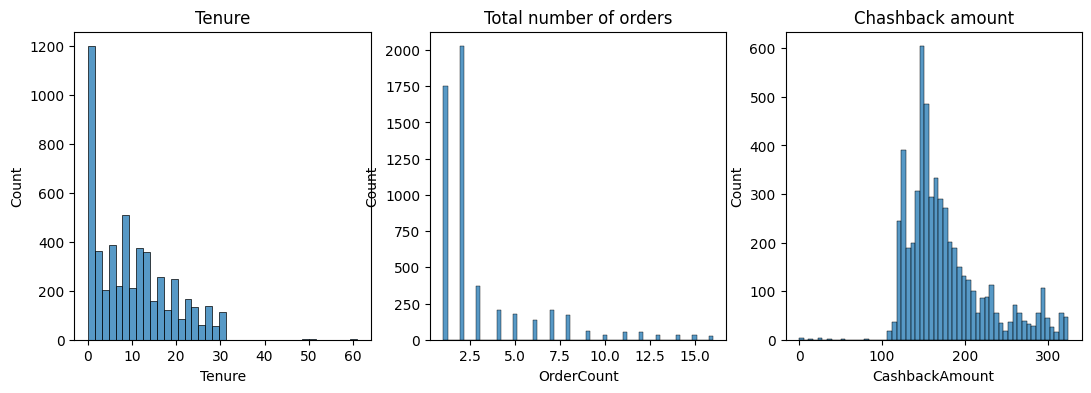

In [25]:
fig, axes = plt.subplots(1,3, figsize=(13,4))

# Tenure
sns.histplot(x="Tenure", data=df, ax=axes[0])
axes[0].set_title("Tenure")

#OrderCount
sns.histplot(x="OrderCount", data=df, ax=axes[1])
axes[1].set_title("Total number of orders")

# Cashback
sns.histplot(x="CashbackAmount", data=df, ax=axes[2])
axes[2].set_title("Chashback amount")

plt.show()

In [26]:
df.corrwith(df['Churn']).abs().sort_values(ascending=False)

<ipython-input-26-b361e99cad45>:1: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corrwith(df['Churn']).abs().sort_values(ascending=False)


Churn                          1.000000
Tenure                         0.349408
Complain                       0.250188
DaySinceLastOrder              0.160757
CashbackAmount                 0.154118
NumberOfDeviceRegistered       0.107939
SatisfactionScore              0.105481
CityTier                       0.084703
WarehouseToHome                0.076630
NumberOfAddress                0.043931
OrderCount                     0.028697
CustomerID                     0.019083
HourSpendOnApp                 0.018675
OrderAmountHikeFromlastYear    0.010058
CouponUsed                     0.008264
dtype: float64

In [27]:
missing_rows = df[df.isnull().any(axis=1)].shape[0]
missing_rows

1856

In [28]:
data = df[['Churn','Tenure','Complain','DaySinceLastOrder','CashbackAmount','MaritalStatus','Gender']]

In [30]:
missing_rows = data[data.isnull().any(axis=1)].shape[0]
missing_rows

571

In [32]:
data=data.dropna()

In [33]:
data['Churn'].value_counts()/len(data)

0    0.839296
1    0.160704
Name: Churn, dtype: float64

In [34]:
encoded = pd.get_dummies(data)
encoded.head()

,Churn,Tenure,Complain,DaySinceLastOrder,CashbackAmount,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Gender_Female,Gender_Male
0,1,4.0,1,5.0,159.93,0,0,1,1,0
3,1,0.0,0,3.0,134.07,0,0,1,0,1
4,1,0.0,0,3.0,129.60,0,0,1,0,1
5,1,0.0,1,7.0,139.19,0,0,1,1,0
8,1,13.0,1,2.0,126.83,1,0,0,0,1


In [35]:
X = encoded.drop("Churn", axis=1)
y = encoded['Churn']

In [36]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [37]:
# prompt: split X into test and train sets with stratify in y

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=0)


              precision    recall  f1-score   support

           0       0.89      0.97      0.93      1062
           1       0.69      0.39      0.50       203

    accuracy                           0.87      1265
   macro avg       0.79      0.68      0.71      1265
weighted avg       0.86      0.87      0.86      1265



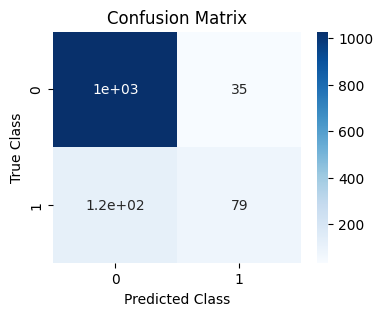

In [39]:
# prompt: create Logistic regression model and determine classification_report and draw heatmap

model = LogisticRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print(metrics.classification_report(y_test, y_pred))
plt.figure(figsize=(4,3))
sns.heatmap(metrics.confusion_matrix(y_test,y_pred), annot=True, cmap="Blues")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.title("Confusion Matrix")
plt.show()


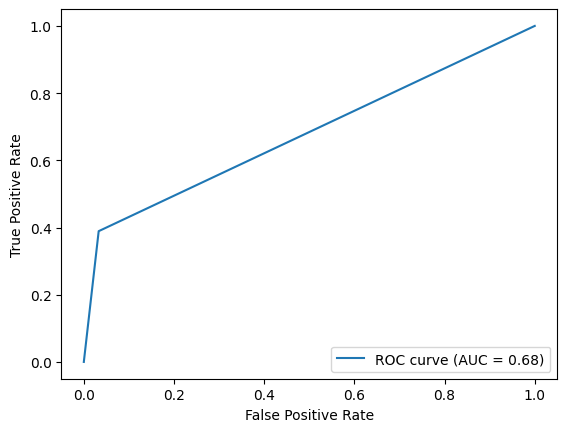

In [40]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()

              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1062
           1       0.62      0.30      0.40       203

    accuracy                           0.86      1265
   macro avg       0.75      0.63      0.66      1265
weighted avg       0.84      0.86      0.84      1265



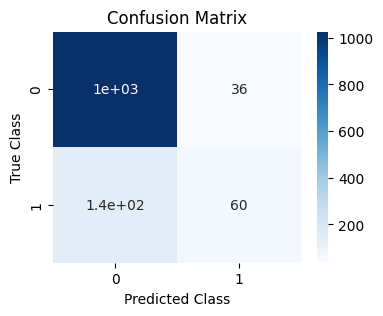

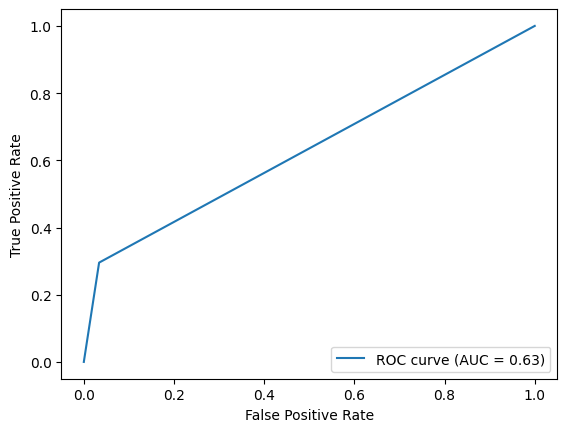

In [41]:
# prompt: create svc model and draw heatmap for classification report and draw roc curve

model = SVC()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print(metrics.classification_report(y_test, y_pred))
plt.figure(figsize=(4,3))
sns.heatmap(metrics.confusion_matrix(y_test,y_pred), annot=True, cmap="Blues")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.title("Confusion Matrix")
plt.show()

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()


              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1062
           1       0.83      0.82      0.83       203

    accuracy                           0.95      1265
   macro avg       0.90      0.90      0.90      1265
weighted avg       0.95      0.95      0.95      1265



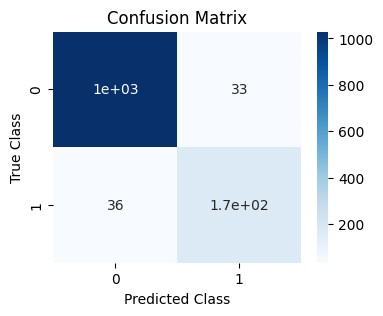

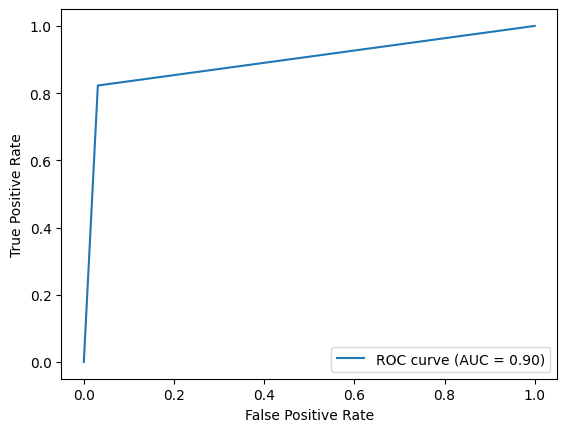

In [42]:
# prompt: create decision tree classifier model and draw heatmap for classification report and draw roc curve

model = DecisionTreeClassifier()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print(metrics.classification_report(y_test, y_pred))
plt.figure(figsize=(4,3))
sns.heatmap(metrics.confusion_matrix(y_test,y_pred), annot=True, cmap="Blues")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.title("Confusion Matrix")
plt.show()

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()


              precision    recall  f1-score   support

           0       0.96      0.97      0.96      1062
           1       0.83      0.77      0.80       203

    accuracy                           0.94      1265
   macro avg       0.89      0.87      0.88      1265
weighted avg       0.94      0.94      0.94      1265



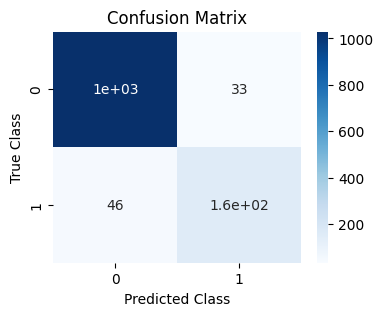

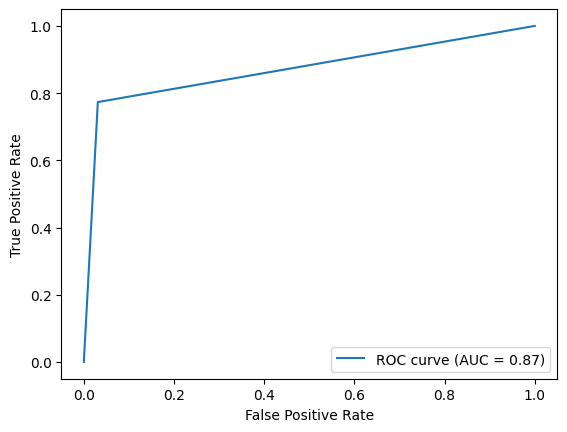

In [43]:
# prompt: create  randomforest classifier model and draw heatmap for classification report and draw roc curve

model = RandomForestClassifier(n_estimators=100)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print(metrics.classification_report(y_test, y_pred))
plt.figure(figsize=(4,3))
sns.heatmap(metrics.confusion_matrix(y_test,y_pred), annot=True, cmap="Blues")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.title("Confusion Matrix")
plt.show()

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()


              precision    recall  f1-score   support

           0       0.95      0.96      0.95      1062
           1       0.77      0.73      0.75       203

    accuracy                           0.92      1265
   macro avg       0.86      0.84      0.85      1265
weighted avg       0.92      0.92      0.92      1265



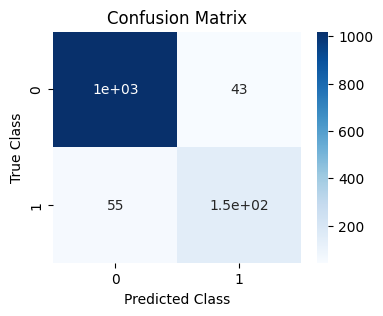

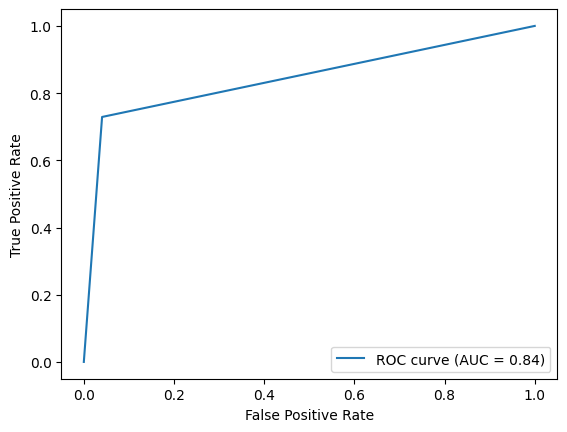

In [44]:
# prompt: create XGBClassifier  model and draw heatmap for classification report and draw roc curve

model = XGBClassifier()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print(metrics.classification_report(y_test, y_pred))
plt.figure(figsize=(4,3))
sns.heatmap(metrics.confusion_matrix(y_test,y_pred), annot=True, cmap="Blues")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.title("Confusion Matrix")
plt.show()

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()
